In [16]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [28]:
ll ../results

total 11112
-rw-r--r--  1 nick  staff  660500 Apr 13 19:47 final-bydrug_0_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  660500 Apr 13 19:47 final-bydrug_1_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  660500 Apr 13 19:47 final-bydrug_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  660500 Apr 13 19:47 final-bydrug_2_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  660500 Apr 13 19:47 final-bydrug_3_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  660500 Apr 12 22:09 final-bydrug_O_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  567000 Apr 12 07:49 test_pred_222_24_25_1e-06.csv
-rw-r--r--  1 nick  staff  567000 Apr 13 19:47 test_pred_222_24_25_1e-06.pth.csv
-rw-r--r--  1 nick  staff  567000 Apr 13 19:47 test_pred_222_24_5_1e-06.csv


In [29]:
results_files = ['../results/final-bydrug_0_222_24_25_1e-06.csv', 
                 '../results/final-bydrug_1_222_24_25_1e-06.csv',
                 '../results/final-bydrug_2_222_24_25_1e-06.csv',
                 '../results/final-bydrug_3_222_24_25_1e-06.csv']

In [30]:
labels = {'not_event': 0, 'is_event': 1}

In [31]:
datapath = '../data/clinical_bert_reference_set.txt'
df = pd.read_csv(datapath)
df.head()

,drug,llt_id,llt,class,string
0,Cimzia,35104113,pancytopenia,is_event,"pancytopenia arthralgia (6% cimzia, 4% placebo..."
1,Cimzia,35104746,lymphadenopathy,is_event,"lymphadenopathy and arthralgia (6% cimzia, 4% ..."
2,Cimzia,35104868,leukopenia,is_event,"leukopenia patients, and arthralgia (6% cimzia..."
3,Cimzia,35122651,anemia,is_event,"anemia placebo-treated patients, and arthralgi..."
4,Cimzia,35122884,cytopenia,not_event,"cytopenia (6% cimzia, 4% placebo). other adver..."


In [32]:
druglist = sorted(set(df['drug']))

random.seed(np_random_seed)
random.shuffle(druglist)

drugs_train, drugs_val, drugs_test = np.split(druglist, [int(0.8*len(druglist)), int(0.9*len(druglist))])

len(drugs_train), len(drugs_val), len(drugs_test)

df_train = df[df['drug'].isin(drugs_train)]
df_val = df[df['drug'].isin(drugs_val)]
df_test = df[df['drug'].isin(drugs_test)]

df_train.shape, df_val.shape, df_test.shape

((88369, 5), (11818, 5), (13210, 5))

In [33]:
refset_fn = '../data/200_manual_annotations_csv/FinalReferenceStandard200Labels.csv'
refset_fh = open(refset_fn)
reader = csv.reader(refset_fh, delimiter='|')
header = next(reader)

gold_standard = set()
for row in reader:
    data = dict(zip(header, row))
    if data['Section Display Name'] != 'ADVERSE REACTIONS':
        continue
    
    if not data['Drug Name'] in drugs_test:
        continue
    
    gold_standard.add((data['Drug Name'], data['Matching String'].lower()))

refset_fh.close()
len(gold_standard)

1074

 refset: 0
 np_random_seed: 222
 random_state: 24
 EPOCHS: 25
 LR: 1e-06

 refset: 1
 np_random_seed: 222
 random_state: 24
 EPOCHS: 25
 LR: 1e-06



<ipython-input-34-5ca7d89cc252>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-34-5ca7d89cc252>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


 refset: 2
 np_random_seed: 222
 random_state: 24
 EPOCHS: 25
 LR: 1e-06



<ipython-input-34-5ca7d89cc252>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-34-5ca7d89cc252>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


 refset: 3
 np_random_seed: 222
 random_state: 24
 EPOCHS: 25
 LR: 1e-06



<ipython-input-34-5ca7d89cc252>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-34-5ca7d89cc252>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


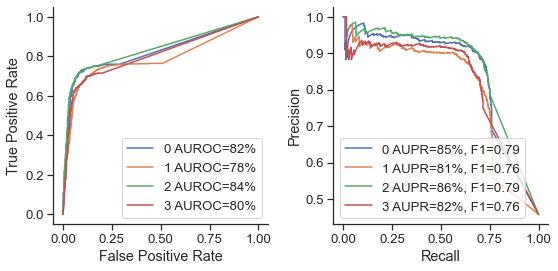

In [34]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))
first = True

for resultspath in results_files:
    refset = resultspath.split('_')[1]
    np_random_seed = int(resultspath.split('_')[2])
    random_state = int(resultspath.split('_')[3])
    EPOCHS = int(resultspath.split('_')[4])
    LR = resultspath.split('_')[5].split('.')[0]

    print(f" refset: {refset}")
    print(f" np_random_seed: {np_random_seed}")
    print(f" random_state: {random_state}")
    print(f" EPOCHS: {EPOCHS}")
    print(f" LR: {LR}\n")
    
    res = pd.read_csv(resultspath, header=None)
    
    df_test['Pred0'] = res[0].to_numpy()
    df_test['Pred1'] = res[1].to_numpy()
    
    df_test_grouped = df_test[['drug', 'llt', 'Pred1', 'Pred0']].groupby(by=['drug', 'llt']).mean().reset_index()

    # for all of the drug, event pairs that couldn't be scored we add them with 0's 
    # otherwise we will way overestimate our recall
    scored_pairs = set()
    for index, row in df_test_grouped.iterrows():
        scored_pairs.add((row['drug'], row['llt']))

    for d, e in (gold_standard-scored_pairs):
        df_test_grouped = df_test_grouped.append({'drug': d, 'llt': e, 'Pred1': 0.0, 'Pred0': 0.0}, ignore_index=True)
    
    grouped_y = [1 if ((row['drug'], row['llt']) in gold_standard) else 0 for index, row in df_test_grouped.iterrows()]
    
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = metrics.roc_curve(grouped_y, df_test_grouped['Pred1'])
    plt.plot(fpr, tpr, label='%s AUROC=%.0f%%' % (refset, 100*roc_auc_score(grouped_y, df_test_grouped['Pred1'])))
    plt.legend()
    if first:
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        sns.despine()
    
    plt.subplot(1, 2, 2)
    precision, recall, thresholds = metrics.precision_recall_curve(grouped_y, df_test_grouped['Pred1'])
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = thresholds[np.argmax(f1_scores)]

    plt.plot(recall, precision, label='%s AUPR=%.0f%%, F1=%.2f' % (refset, 100*metrics.auc(recall, precision), max_f1))
    plt.legend()
    if first:
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        sns.despine()
    
    first = False

plt.tight_layout()
plt.savefig(f'../figures/testperf_groupedallse_compare_{np_random_seed}_{random_state}_{EPOCHS}_{LR}.pdf')